# Problem Statement
A real estate company is analyzing house price trends based on various features such as lot size, number of bedrooms, number of bathrooms, location, and house condition. Your task as a data scientist is to analyze, clean, and visualize the dataset to gain insights.

## Tasks

### Load the Dataset
1. Download the dataset from an online source.
2. Load it into a Pandas DataFrame.
3. Display basic information about the dataset.

### Data Cleaning & Preprocessing
1. Identify and handle missing values.
2. Detect and remove duplicate records.
3. Rename columns for better readability.

### Exploratory Data Analysis (EDA)
1. Summary statistics of numerical and categorical features.
2. Distribution analysis using histograms and KDE plots.
3. Pairwise relationships using scatter plots.
4. Feature correlation using a heatmap.

### Outlier Detection and Treatment
1. Identify outliers using box plots and Z-score analysis.
2. Remove or cap extreme outliers based on domain knowledge.

### Data Visualization
1. Bar plots for categorical variables.
2. Pair plots for numerical variables.
3. Scatter plots for target variable relationships.
4. Heatmap for correlations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Step 1: Load the Dataset

Boston Housing data was actually downloaded from fairlearn.datasets. This data has a fairness warning

In [3]:
df=pd.read_csv('BostonHousingFairlearnDataset.csv')

### Step 2: Basic Information

In [4]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  MEDV        506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB
None


In [5]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

     TAX  PTRATIO       B  LSTAT  MEDV  
0  296.0     15.3  396.90   4.98  24.0  
1  242.0     17.8  396.90   9.14  21.6  
2  242.0     17.8  392.83   4.03  34.7  
3  222.0     18.7  394.63   2.94  33.4  
4  222.0     18.7  396.90   5.33  36.2  


In [6]:
print("\nDataset Shape:", df.shape)


Dataset Shape: (506, 15)


### Step 3: Checking for Missing Values

In [7]:
print("\nMissing Values Count:")
print(df.isnull().sum())


Missing Values Count:
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
MEDV          0
dtype: int64


### Step 4: Summary Statistics

In [8]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std   

### Step 5: Correlation Analysis

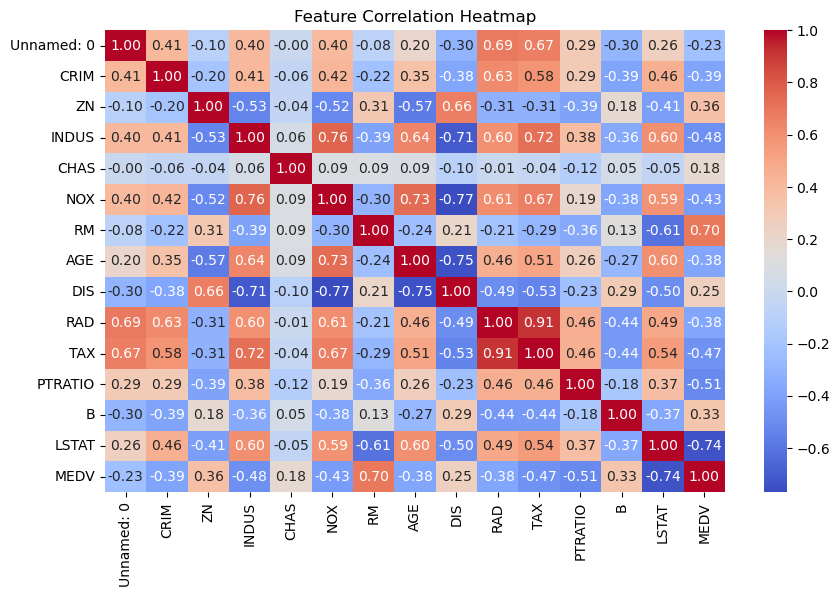

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Step 6: Distribution Analysis (Histogram and KDE)

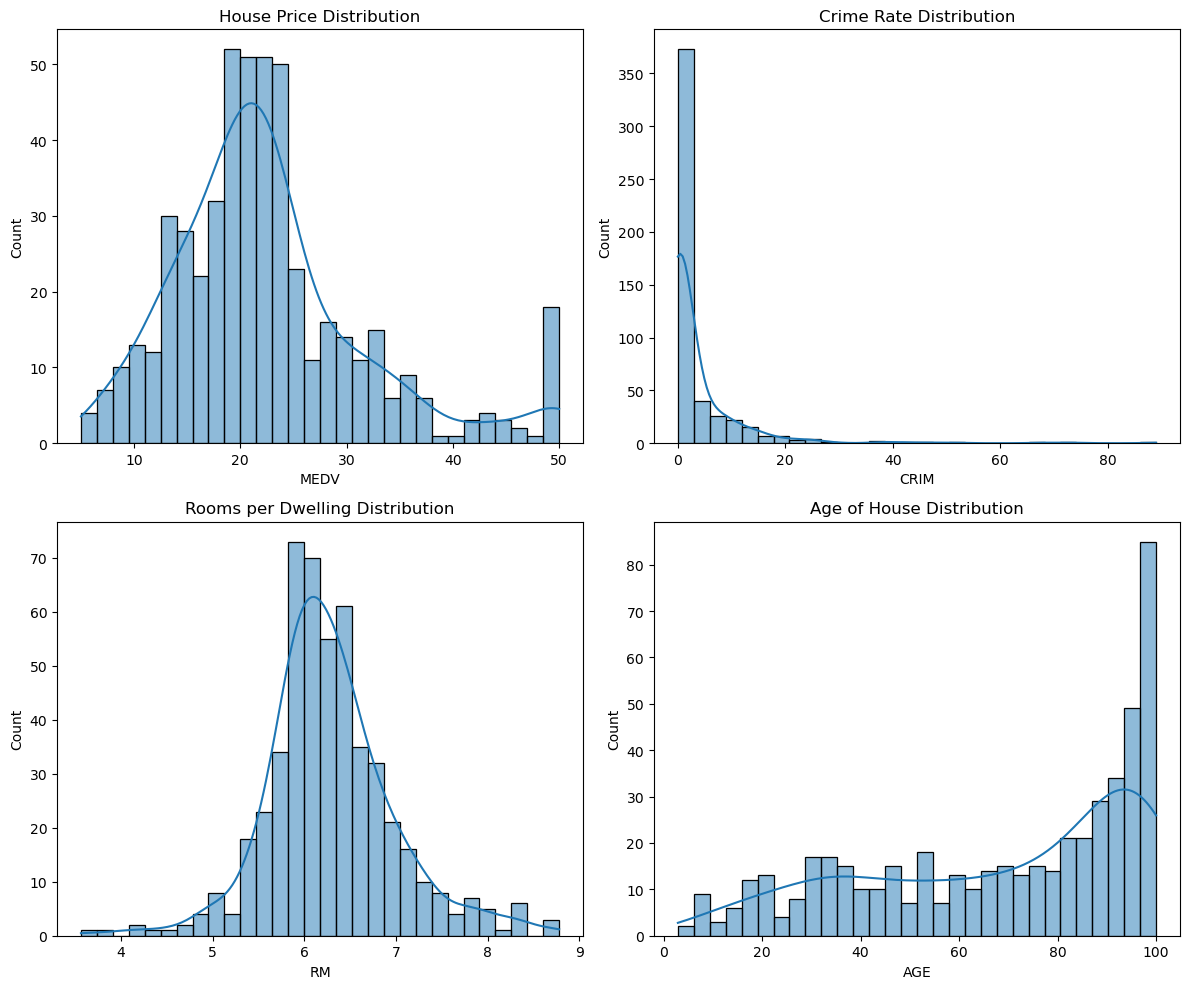

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['MEDV'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('House Price Distribution')

sns.histplot(df['CRIM'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Crime Rate Distribution')

sns.histplot(df['RM'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Rooms per Dwelling Distribution')

sns.histplot(df['AGE'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Age of House Distribution')

plt.tight_layout()
plt.show()

### Step 7: Checking for Outliers using Boxplot

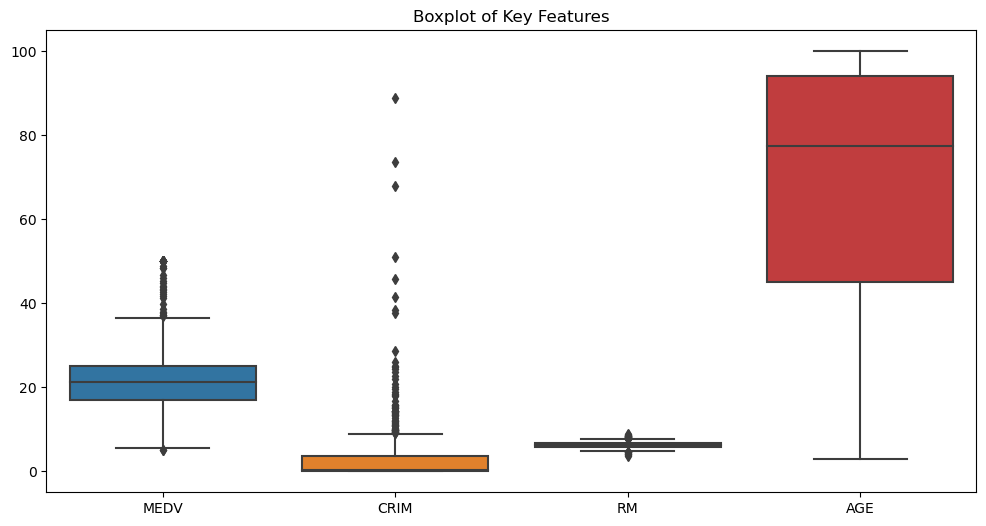

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MEDV', 'CRIM', 'RM', 'AGE']])
plt.title("Boxplot of Key Features")
plt.show()

### Step 8: Outlier Treatment (Using Z-Score)

In [12]:
z_scores = np.abs(stats.zscore(df[['MEDV', 'CRIM', 'RM', 'AGE']]))
threshold = 3
outliers = (z_scores > threshold).sum()
print("\nNumber of Outliers per Feature:\n", outliers)


Number of Outliers per Feature:
 MEDV    0
CRIM    8
RM      8
AGE     0
dtype: int64


### Removing extreme outliers beyond Z-score threshold

In [13]:
df_cleaned = df[(z_scores < threshold).all(axis=1)]
print("\nDataset Shape After Outlier Removal:", df_cleaned.shape)


Dataset Shape After Outlier Removal: (490, 15)


### Step 9: Scatter Plot - RM vs MEDV (Rooms vs House Price)

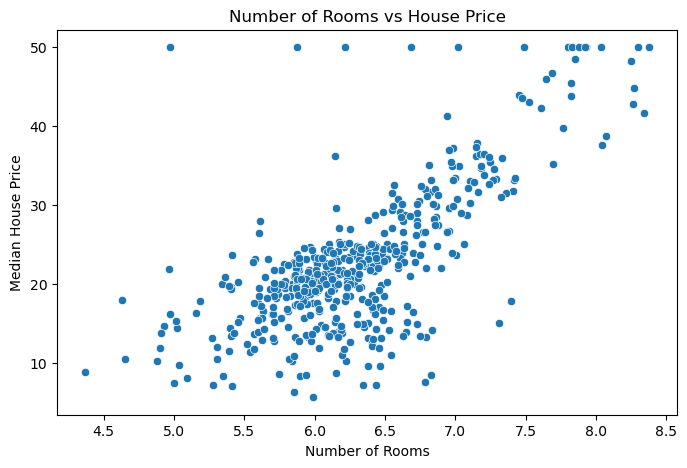

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned['RM'], y=df_cleaned['MEDV'])
plt.title('Number of Rooms vs House Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Median House Price')
plt.show()

### Step 10: Scatter Plot - LSTAT vs MEDV (Lower Status vs House Price)

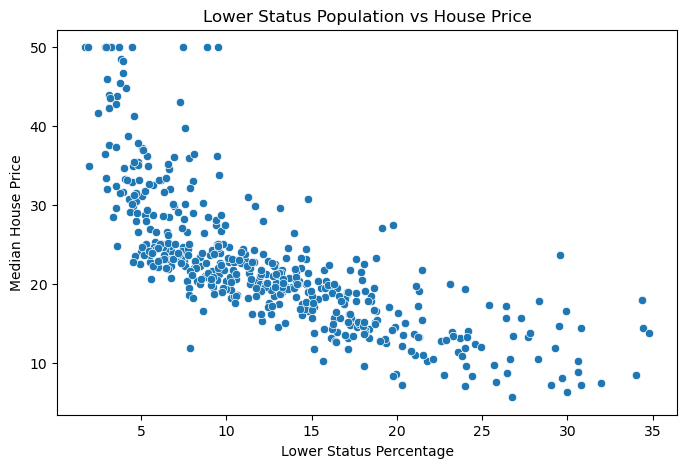

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_cleaned['LSTAT'], y=df_cleaned['MEDV'])
plt.title('Lower Status Population vs House Price')
plt.xlabel('Lower Status Percentage')
plt.ylabel('Median House Price')
plt.show()

### Step 11: Categorical Variable Analysis - House Age Groups

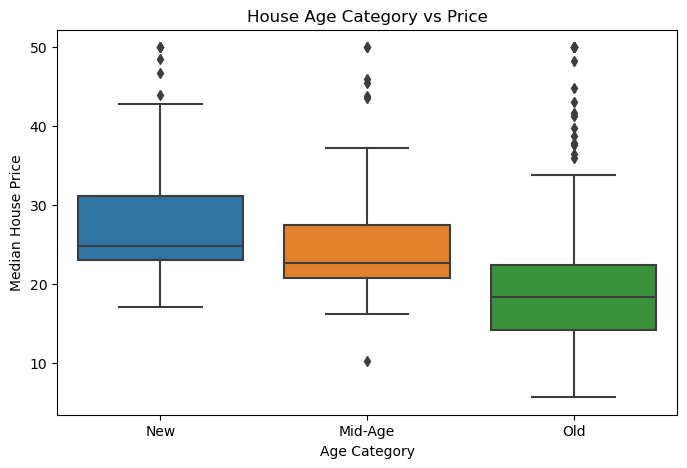

In [16]:
df_cleaned['AGE_CATEGORY'] = pd.cut(df_cleaned['AGE'], bins=[0, 35, 70, 100], labels=['New', 'Mid-Age', 'Old'])

plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned['AGE_CATEGORY'], y=df_cleaned['MEDV'])
plt.title('House Age Category vs Price')
plt.xlabel('Age Category')
plt.ylabel('Median House Price')
plt.show()

### Step 12: Missing Value Treatment (if applicable)

In [17]:
df_cleaned

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_CATEGORY
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,Mid-Age
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,Old
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,Mid-Age
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,Mid-Age
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,Mid-Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,Mid-Age
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,Old
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,Old
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,Old


In [18]:
df_cleaned.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'AGE_CATEGORY'],
      dtype='object')

In [19]:
imputer = SimpleImputer(strategy='median')
columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned[columns]), columns=columns)

### Step 13: Feature Scaling

In [20]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

print("\nFinal Processed DataFrame Shape:", df_scaled.shape)
print(df_scaled.head())


Final Processed DataFrame Shape: (490, 12)
       CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0 -0.539941  0.269047 -1.267140 -0.114132  0.442626 -0.091418  0.107636   
1 -0.535728 -0.493973 -0.572366 -0.710940  0.200772  0.394595  0.525098   
2 -0.535732 -0.493973 -0.572366 -0.710940  1.400620 -0.236867  0.525098   
3 -0.534712 -0.493973 -1.286115 -0.806084  1.106939 -0.779641  1.046319   
4 -0.527350 -0.493973 -1.286115 -0.806084  1.340941 -0.481647  1.046319   

        TAX   PTRATIO         B     LSTAT      MEDV  
0 -0.641902 -1.457050  0.431179 -1.086511  0.155200  
1 -0.968311 -0.294636  0.431179 -0.484539 -0.114793  
2 -0.968311 -0.294636  0.384458 -1.223981  1.358918  
3 -1.089203  0.123833  0.405121 -1.381709  1.212672  
4 -1.089203  0.123833  0.431179 -1.035864  1.527663  
